Reading CSV.


In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
import seaborn as sns

DataFrameTrain = pd.read_csv('train.csv')
DataFrameTest = pd.read_csv('test.csv')

Initial Exploration

In [2]:
DataFrameTrain.shape

(2000, 21)

In [3]:
DataFrameTest.shape

(1000, 21)

In [4]:
DataFrameTrain.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
DataFrameTest.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


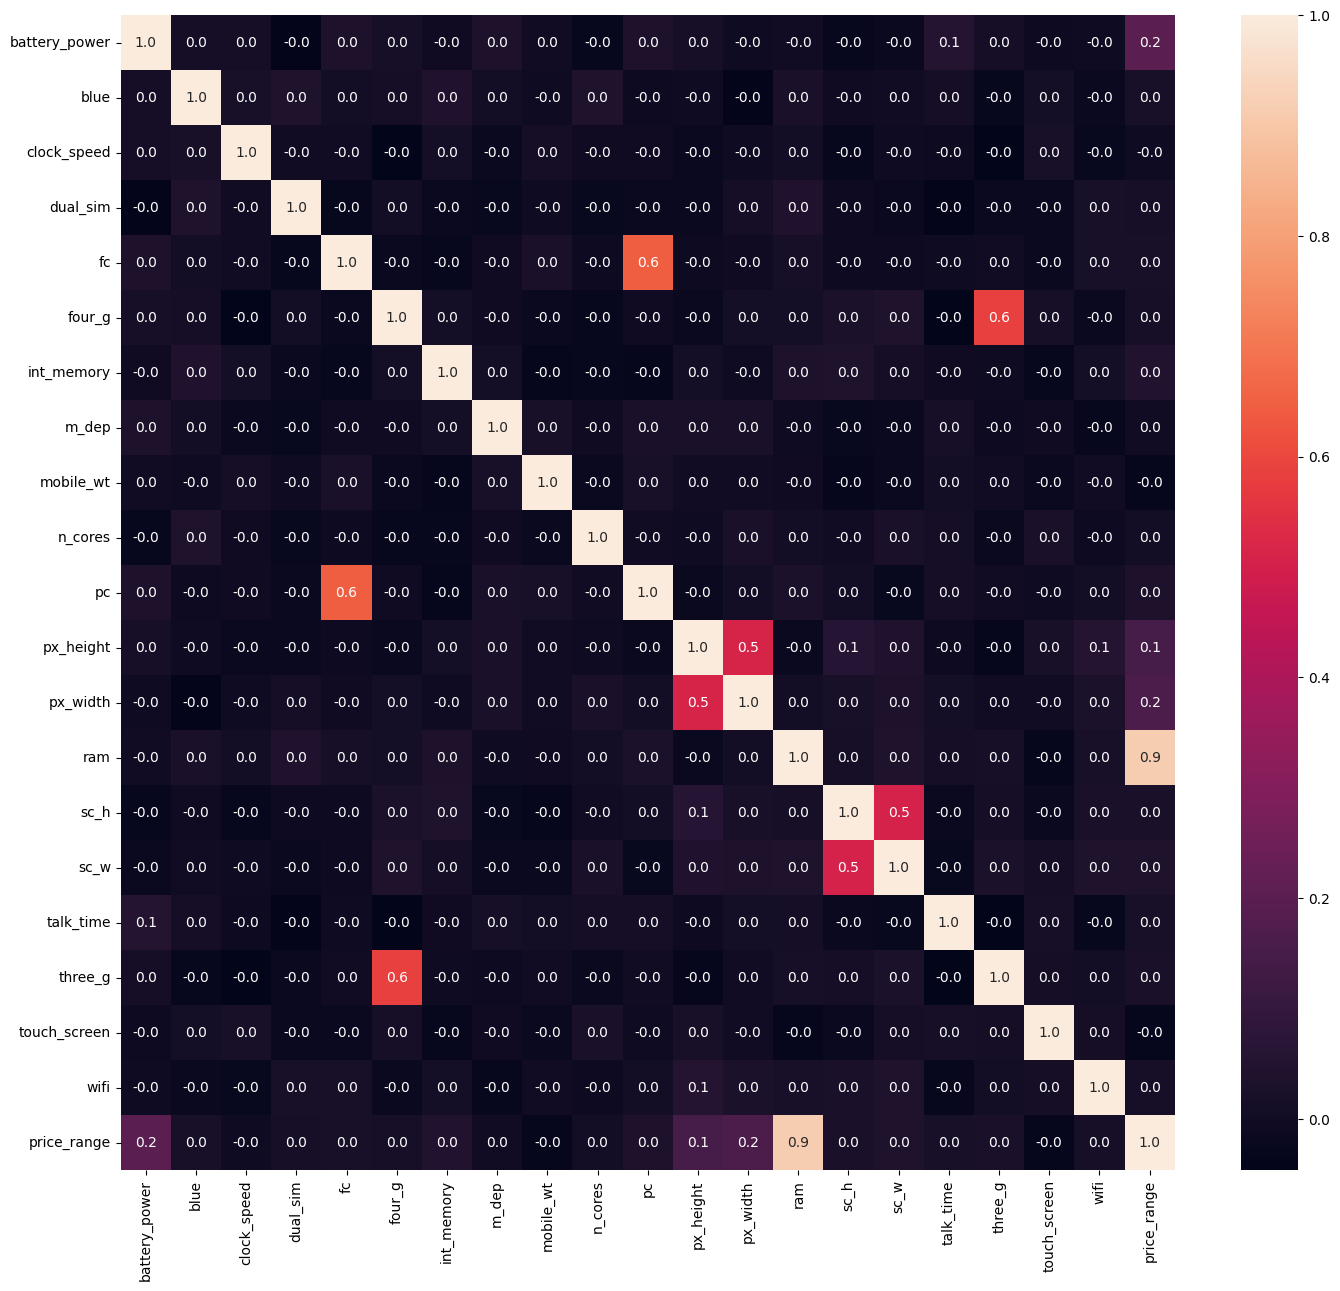

In [6]:
import matplotlib.pyplot as plt

corr_matrix = DataFrameTrain.corr()
plt.figure(figsize=(17,15))
sns.heatmap(corr_matrix, annot= True, fmt= '.1f')
plt.show()

DataFrameTrain has price_range wich is the label that we're going to separate.

In [7]:
DataFrameTrain.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
X = DataFrameTrain.drop(columns=['price_range'])
y = DataFrameTrain.price_range

In [9]:
X.shape

(2000, 20)

Four types of labels

In [10]:
y.unique()

array([1, 2, 3, 0], dtype=int64)

DataFrameTest has id wich we're going to drop

In [11]:
DataFrameTest.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [12]:
DataFrameTest = DataFrameTest.drop(columns=['id'])

In [13]:
DataFrameTest.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

DataFrameTest is the "new" unlabeled data

Verifying if there is any missing data

In [14]:
DataFrameTrain.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [15]:
DataFrameTrain.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [16]:
DataFrameTest.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [17]:
DataFrameTest.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

Same amount of labels

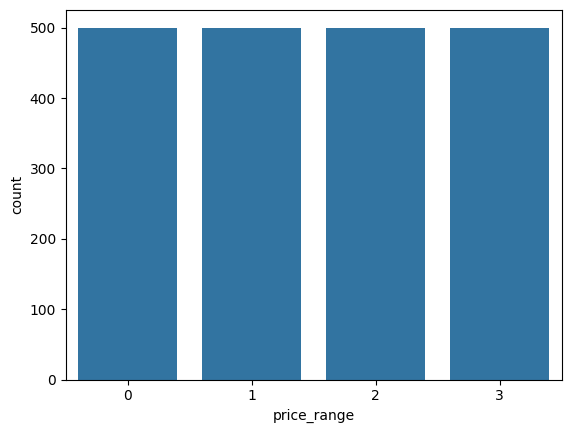

In [18]:
ax = sns.countplot(x='price_range', data = DataFrameTrain)

Using a randomized train_test_split

In [19]:
from sklearn.model_selection import train_test_split
import numpy as np

SEED = 42
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 20)
(600, 20)
(1400,)
(600,)


Baseline with DummyClassifier

In [21]:
from sklearn.dummy import DummyClassifier

SEED = 42
np.random.seed(SEED)

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
dummy_predict = dummy.predict(X_test)
dummy_accuracy = accuracy_score( y_test,dummy_predict)

print(f'DummyClassifier accuracy - {dummy_accuracy*100:.2f}%')

DummyClassifier accuracy - 24.33%


In [22]:
from sklearn.ensemble import RandomForestClassifier

SEED = 42
np.random.seed(SEED)

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
predict = randomforest.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test,predict)

In [25]:
print(f'RandomForestClassifier accuracy - {accuracy*100:.2f}%')

RandomForestClassifier accuracy - 86.67%
